In [0]:
# importing Keras libraries
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
 

In [6]:
# spliting Data in train and test randomly
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [9]:
# Converting 3D data to 2D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# normalizing data
X_train = X_train/255
X_test = X_test/255

In [0]:
#converting output to categorical
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# some model parameters
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h2> MLP + ReLU + ADAM </h2>

<h3> 2 Layer Architecture </h3>

T1 : H1 = 375, H2 = 75

In [14]:
model_relu = Sequential()
model_relu.add(Dense(375, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(75, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 375)               294375    
_________________________________________________________________
batch_normalization_3 (Batch (None, 375)               1500      
_________________________________________________________________
dropout_3 (Dropout)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 75)                28200     
_________________________________________________________________
batch_normalization_4 (Batch (None, 75)                300       
_________________________________________________________________
dropout_4 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                760       
Total para

Test score: 0.06514618580028182
Test accuracy: 0.9829


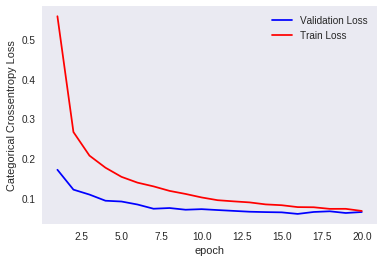

In [15]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

T2 : H1 = 450 , H2 = 150

In [16]:
model_relu1 = Sequential()
model_relu1.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu1.add(BatchNormalization())
model_relu1.add(Dropout(0.5))

model_relu1.add(Dense(120, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu1.add(BatchNormalization())
model_relu1.add(Dropout(0.5))

model_relu1.add(Dense(output_dim, activation='softmax'))

print(model_relu1.summary())

model_relu1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 450)               353250    
_________________________________________________________________
batch_normalization_5 (Batch (None, 450)               1800      
_________________________________________________________________
dropout_5 (Dropout)          (None, 450)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               54120     
_________________________________________________________________
batch_normalization_6 (Batch (None, 120)               480       
_________________________________________________________________
dropout_6 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1210      
Total para

Test score: 0.05803709232400288
Test accuracy: 0.9839


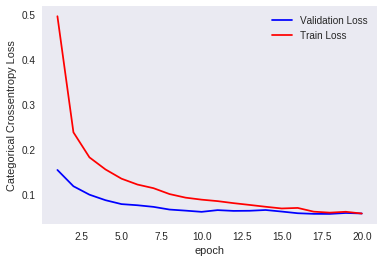

In [17]:
score = model_relu1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3> 3 Layer Architecture </h3>

T1 : H1 = 475, H2 = 275,H3 = 75

In [18]:
model_relu3a = Sequential()
model_relu3a.add(Dense(475, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu3a.add(BatchNormalization())
model_relu3a.add(Dropout(0.5))

model_relu3a.add(Dense(275, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu3a.add(BatchNormalization())
model_relu3a.add(Dropout(0.5))

model_relu3a.add(Dense(75, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu3a.add(BatchNormalization())
model_relu3a.add(Dropout(0.5))

model_relu3a.add(Dense(output_dim, activation='softmax'))

print(model_relu3a.summary())

model_relu3a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3a.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 475)               372875    
_________________________________________________________________
batch_normalization_7 (Batch (None, 475)               1900      
_________________________________________________________________
dropout_7 (Dropout)          (None, 475)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 275)               130900    
_________________________________________________________________
batch_normalization_8 (Batch (None, 275)               1100      
_________________________________________________________________
dropout_8 (Dropout)          (None, 275)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 75)                20700     
__________

Test score: 0.060095479226729365
Test accuracy: 0.983


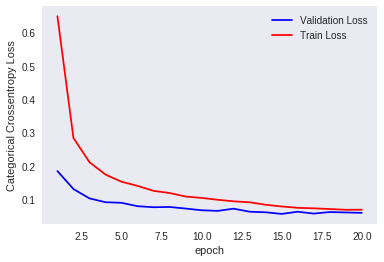

In [19]:
score = model_relu3a.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

T2 : H1 = 375, H2 = 165,H3 = 55

In [20]:
model_relu3b = Sequential()
model_relu3b.add(Dense(375, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu3b.add(BatchNormalization())
model_relu3b.add(Dropout(0.5))

model_relu3b.add(Dense(165, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu3b.add(BatchNormalization())
model_relu3b.add(Dropout(0.5))

model_relu3b.add(Dense(55, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu3b.add(BatchNormalization())
model_relu3b.add(Dropout(0.5))

model_relu3b.add(Dense(output_dim, activation='softmax'))

print(model_relu3b.summary())

model_relu3b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3b.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 375)               294375    
_________________________________________________________________
batch_normalization_10 (Batc (None, 375)               1500      
_________________________________________________________________
dropout_10 (Dropout)         (None, 375)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 165)               62040     
_________________________________________________________________
batch_normalization_11 (Batc (None, 165)               660       
_________________________________________________________________
dropout_11 (Dropout)         (None, 165)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 55)                9130      
__________

Test score: 0.06521012428215472
Test accuracy: 0.9823


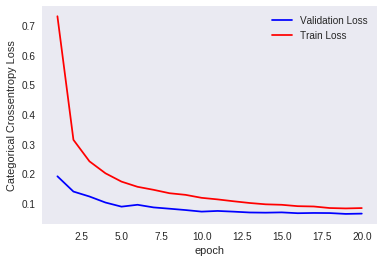

In [21]:
score = model_relu3b.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3> 5 Layer Architecture </h3>

T1 : H1=475, H2 = 350, H3 = 240, H4 = 123, H5=40

In [25]:
model_relu5a = Sequential()
model_relu5a.add(Dense(475, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu5a.add(BatchNormalization())
model_relu5a.add(Dropout(0.5))

model_relu5a.add(Dense(350, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu5a.add(BatchNormalization())
model_relu5a.add(Dropout(0.4))

model_relu5a.add(Dense(240, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu5a.add(BatchNormalization())
model_relu5a.add(Dropout(0.3))

model_relu5a.add(Dense(123, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu5a.add(BatchNormalization())
model_relu5a.add(Dropout(0.2))

model_relu5a.add(Dense(40, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu5a.add(BatchNormalization())
model_relu5a.add(Dropout(0.1))

model_relu5a.add(Dense(output_dim, activation='softmax'))

print(model_relu5a.summary())

model_relu5a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu5a.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 475)               372875    
_________________________________________________________________
batch_normalization_23 (Batc (None, 475)               1900      
_________________________________________________________________
dropout_23 (Dropout)         (None, 475)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 350)               166600    
_________________________________________________________________
batch_normalization_24 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_24 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 240)               84240     
__________

Test score: 0.056956459587812425
Test accuracy: 0.9854


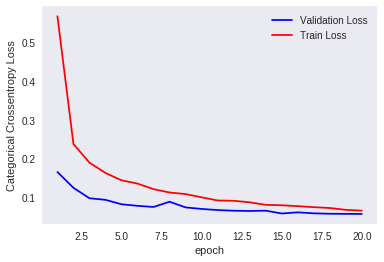

In [26]:
score = model_relu5a.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

T2 : H1=509, H2 = 382, H3 = 255, H4 = 136, H5=52

In [27]:
model_relu5b = Sequential()
model_relu5b.add(Dense(475, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu5b.add(BatchNormalization())
model_relu5b.add(Dropout(0.5))

model_relu5b.add(Dense(350, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu5b.add(BatchNormalization())
model_relu5b.add(Dropout(0.4))

model_relu5b.add(Dense(240, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu5b.add(BatchNormalization())
model_relu5b.add(Dropout(0.3))

model_relu5b.add(Dense(123, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu5b.add(BatchNormalization())
model_relu5b.add(Dropout(0.2))

model_relu5b.add(Dense(40, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu5b.add(BatchNormalization())
model_relu5b.add(Dropout(0.1))

model_relu5b.add(Dense(output_dim, activation='softmax'))

print(model_relu5b.summary())

model_relu5b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu5b.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 475)               372875    
_________________________________________________________________
batch_normalization_28 (Batc (None, 475)               1900      
_________________________________________________________________
dropout_28 (Dropout)         (None, 475)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 350)               166600    
_________________________________________________________________
batch_normalization_29 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_29 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 240)               84240     
__________

Test score: 0.05514208077131771
Test accuracy: 0.9848


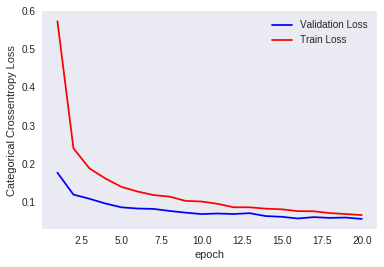

In [28]:
score = model_relu5b.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [30]:
pip install PTable

  Stored in directory: /root/.cache/pip/wheels/22/cc/2e/55980bfe86393df3e9896146a01f6802978d09d7ebcba5ea56
Successfully built PTable


<h3>CONCLUSION :</h3>

In [32]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Trail","Arcchiecture", "Hidden layers","Test Accuracy"]

x.add_row(["T1", 2, "H1 = 375, H2 = 75", 98.29])
x.add_row(["T2", 2, "H1 = 450 , H2 = 150",98.39])
x.add_row(["T1", 3, "H1 = 475, H2 = 275,H3 = 75", 98.3])
x.add_row(["T2", 3, "H1 = 375, H2 = 165,H3 = 55", 98.23])
x.add_row(["T1", 5, "H1=475, H2 = 350, H3 = 240, H4 = 123, H5=40", 98.54])
x.add_row(["T2", 5, "H1=509, H2 = 382, H3 = 255, H4 = 136, H5=52", 98.48])

print(x)

+-------+--------------+---------------------------------------------+---------------+
| Trail | Arcchiecture |                Hidden layers                | Test Accuracy |
+-------+--------------+---------------------------------------------+---------------+
|   T1  |      2       |              H1 = 375, H2 = 75              |     98.29     |
|   T2  |      2       |             H1 = 450 , H2 = 150             |     98.39     |
|   T1  |      3       |          H1 = 475, H2 = 275,H3 = 75         |      98.3     |
|   T2  |      3       |          H1 = 375, H2 = 165,H3 = 55         |     98.23     |
|   T1  |      5       | H1=475, H2 = 350, H3 = 240, H4 = 123, H5=40 |     98.54     |
|   T2  |      5       | H1=509, H2 = 382, H3 = 255, H4 = 136, H5=52 |     98.48     |
+-------+--------------+---------------------------------------------+---------------+




*   5 Layer Architecture tends to perform better with reducing dropout rates
*   2 and 3 Layer Architecture performed nearly same with constant droput rate

